# More Data Gathering/Processing and Training Model

## Import Libraries

In [6]:
import pandas as pd
import requests
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import preprocessing
import pylab
import matplotlib.pyplot as plt
import re
import random
pd.set_option('display.max_columns', 500)
%matplotlib inline
from IPython.display import Image
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from sklearn.externals import joblib
import time
df = pd.read_csv("data_ready.csv")
#df = pd.read_csv('https://raw.githubusercontent.com/Columbia-Intro-Data-Science/python-introduction-lee-jw/master/data_ready.csv')

In [3]:
df.head()


,title,slug,ticker,platform,origin,token_price_in_usd,total_raised_in_usd,whitelist_required,alexa_global_rank,twitter_participants,telegram_members,rating,y
0,0x,0x,ZRX,Ethereum,Americas,0.0480,24000000.0,True,94140,129385,5915,4.3,1
1,1World,1world,1WO,Ethereum,Asia,1.2000,11000000.0,True,1368823,8633,8308,4.3,1
2,300 Token,300-token,300,Ethereum,Asia,79.7600,16724.0,False,3331243,8430,84876,1.7,0
3,AbjCoin,abjcoin,ABJ,Ethereum,Asia,0.5000,450000.0,False,1400355,21481,69049,4.1,1
4,Adbank,adbank,ADB,Ethereum,Americas,0.0465,14000000.0,False,585009,7854,14310,3.3,0


## Grab [y] data based on [X] data gathered/processed before

In [9]:
current_prices = ['current_price']
list_url = "https://api.coinmarketcap.com/v2/listings/"
price_data = requests.get(list_url).json()["data"] 
error = ['errors']
#ticker_url = "https://api.coinmarketcap.com/v2/ticker/"
#ticker_data = requests.get(ticker_url).json()["data"]
def getPrice(ticker):
    for i in range(len(price_data)-1):
        if price_data[i]['symbol'] == ticker:
            ticker_url = "https://api.coinmarketcap.com/v2/ticker/"+str(price_data[i]['id'])
            print(ticker_url)
    print(current_prices)
    ticker_data = requests.get(ticker_url).json()["data"]
    price = ticker_data["quotes"]["USD"]["price"]
    return(price)

tickers = df['ticker']
print(len(tickers))

for i in range(len(tickers)-1):
    current_prices.append(getPrice(tickers[i]))
    print(i)
    time.sleep(3)

416
https://api.coinmarketcap.com/v2/ticker/1896
['current_price']
0
https://api.coinmarketcap.com/v2/ticker/2601
['current_price', 1.86029]
1
https://api.coinmarketcap.com/v2/ticker/1840
['current_price', 1.86029, 0.285483]
2
https://api.coinmarketcap.com/v2/ticker/2171
['current_price', 1.86029, 0.285483, 810.412]
3
https://api.coinmarketcap.com/v2/ticker/2501
['current_price', 1.86029, 0.285483, 810.412, 0.0162464]
4
https://api.coinmarketcap.com/v2/ticker/1768
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876]
5
https://api.coinmarketcap.com/v2/ticker/2646
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115]
6
https://api.coinmarketcap.com/v2/ticker/2660
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267]
7
https://api.coinmarketcap.com/v2/ticker/1883
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523]
8
https://api.coinmarketcap.com/v2/ticker/1775
['current_price'

35
https://api.coinmarketcap.com/v2/ticker/2466
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425]
36
https://api.coinmarketcap.com/v2/ticker/2204
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599]
37
https://api.coinmarketcap.com/v2/ticker/2572
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.2

52
https://api.coinmarketcap.com/v2/ticker/1063
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177]
53
https://api.coinmarketcap.com/v2/ticker/2374
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0

65
https://api.coinmarketcap.com/v2/ticker/1873
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637]
66
https://api.coinmarketcap.com/v2/ticker/2223
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 

https://api.coinmarketcap.com/v2/ticker/2654
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028]
77
https://api.coinmarketcap.com/v2/ticker/543
https://api.coinmarketcap.com/v2/ticker/1866
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876

86
https://api.coinmarketcap.com/v2/ticker/2060
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212]
87
https://api.coinmarketcap.com/v2/ticker/1556

95
https://api.coinmarketcap.com/v2/ticker/1729
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163,

103
https://api.coinmarketcap.com/v2/ticker/2049
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

111
https://api.coinmarketcap.com/v2/ticker/1777
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

118
https://api.coinmarketcap.com/v2/ticker/1590
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

125
https://api.coinmarketcap.com/v2/ticker/2175
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

131
https://api.coinmarketcap.com/v2/ticker/2207
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

137
https://api.coinmarketcap.com/v2/ticker/2110
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

143
https://api.coinmarketcap.com/v2/ticker/2057
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

149
https://api.coinmarketcap.com/v2/ticker/2208
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

155
https://api.coinmarketcap.com/v2/ticker/1027
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

160
https://api.coinmarketcap.com/v2/ticker/2120
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

165
https://api.coinmarketcap.com/v2/ticker/2547
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

170
https://api.coinmarketcap.com/v2/ticker/2280
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

175
https://api.coinmarketcap.com/v2/ticker/2626
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

180
https://api.coinmarketcap.com/v2/ticker/1801
https://api.coinmarketcap.com/v2/ticker/2336
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0

185
https://api.coinmarketcap.com/v2/ticker/2534
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

190
https://api.coinmarketcap.com/v2/ticker/2134
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

195
https://api.coinmarketcap.com/v2/ticker/2680
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

199
https://api.coinmarketcap.com/v2/ticker/2176
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

203
https://api.coinmarketcap.com/v2/ticker/138
https://api.coinmarketcap.com/v2/ticker/1408
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.

207
https://api.coinmarketcap.com/v2/ticker/1961
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

211
https://api.coinmarketcap.com/v2/ticker/1967
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

215
https://api.coinmarketcap.com/v2/ticker/2103
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

219
https://api.coinmarketcap.com/v2/ticker/2504
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

223
https://api.coinmarketcap.com/v2/ticker/2378
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

227
https://api.coinmarketcap.com/v2/ticker/1743
https://api.coinmarketcap.com/v2/ticker/1982
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0

231
https://api.coinmarketcap.com/v2/ticker/2594
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

235
https://api.coinmarketcap.com/v2/ticker/2615
https://api.coinmarketcap.com/v2/ticker/2677
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0

239
https://api.coinmarketcap.com/v2/ticker/2287
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

243
https://api.coinmarketcap.com/v2/ticker/2554
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

247
https://api.coinmarketcap.com/v2/ticker/2325
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

251
https://api.coinmarketcap.com/v2/ticker/1552
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

255
https://api.coinmarketcap.com/v2/ticker/1715
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

259
https://api.coinmarketcap.com/v2/ticker/1776
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

263
https://api.coinmarketcap.com/v2/ticker/1902
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

266
https://api.coinmarketcap.com/v2/ticker/2305
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

269
https://api.coinmarketcap.com/v2/ticker/2318
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

272
https://api.coinmarketcap.com/v2/ticker/2420
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

275
https://api.coinmarketcap.com/v2/ticker/2005
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

278
https://api.coinmarketcap.com/v2/ticker/1808
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

281
https://api.coinmarketcap.com/v2/ticker/2467
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

284
https://api.coinmarketcap.com/v2/ticker/2495
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

287
https://api.coinmarketcap.com/v2/ticker/2244
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

290
https://api.coinmarketcap.com/v2/ticker/2461
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

293
https://api.coinmarketcap.com/v2/ticker/2279
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

296
https://api.coinmarketcap.com/v2/ticker/2630
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

299
https://api.coinmarketcap.com/v2/ticker/2245
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

302
https://api.coinmarketcap.com/v2/ticker/1974
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

305
https://api.coinmarketcap.com/v2/ticker/2213
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

308
https://api.coinmarketcap.com/v2/ticker/2212
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

311
https://api.coinmarketcap.com/v2/ticker/2124
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

314
https://api.coinmarketcap.com/v2/ticker/2112
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

317
https://api.coinmarketcap.com/v2/ticker/2071
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

320
https://api.coinmarketcap.com/v2/ticker/1418
https://api.coinmarketcap.com/v2/ticker/2096
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0

323
https://api.coinmarketcap.com/v2/ticker/1996
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

326
https://api.coinmarketcap.com/v2/ticker/2402
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

329
https://api.coinmarketcap.com/v2/ticker/2581
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

332
https://api.coinmarketcap.com/v2/ticker/2313
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

335
https://api.coinmarketcap.com/v2/ticker/2277
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

338
https://api.coinmarketcap.com/v2/ticker/2309
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

341
https://api.coinmarketcap.com/v2/ticker/2381
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

344
https://api.coinmarketcap.com/v2/ticker/2295
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

347
https://api.coinmarketcap.com/v2/ticker/2493
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

350
https://api.coinmarketcap.com/v2/ticker/2297
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

353
https://api.coinmarketcap.com/v2/ticker/1984
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

356
https://api.coinmarketcap.com/v2/ticker/1933
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

359
https://api.coinmarketcap.com/v2/ticker/1125
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

362
https://api.coinmarketcap.com/v2/ticker/2578
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

365
https://api.coinmarketcap.com/v2/ticker/2011
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

368
https://api.coinmarketcap.com/v2/ticker/2507
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

371
https://api.coinmarketcap.com/v2/ticker/2166
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

374
https://api.coinmarketcap.com/v2/ticker/2431
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

377
https://api.coinmarketcap.com/v2/ticker/2576
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

380
https://api.coinmarketcap.com/v2/ticker/1588
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

383
https://api.coinmarketcap.com/v2/ticker/1905
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

386
https://api.coinmarketcap.com/v2/ticker/2597
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

389
https://api.coinmarketcap.com/v2/ticker/2320
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

392
https://api.coinmarketcap.com/v2/ticker/2384
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

395
https://api.coinmarketcap.com/v2/ticker/2267
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

398
https://api.coinmarketcap.com/v2/ticker/2269
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

400
https://api.coinmarketcap.com/v2/ticker/2511
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

402
https://api.coinmarketcap.com/v2/ticker/1979
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

404
https://api.coinmarketcap.com/v2/ticker/1500
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

406
https://api.coinmarketcap.com/v2/ticker/2300
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

408
https://api.coinmarketcap.com/v2/ticker/1968
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

410
https://api.coinmarketcap.com/v2/ticker/2481
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

412
https://api.coinmarketcap.com/v2/ticker/2500
['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163

414


In [11]:
current_prices_backup = current_prices
print(current_prices_backup[49])
print(float(current_prices_backup[49]))

14.3235
14.3235


In [12]:
tickers = df['ticker']
df['whitelist_required'] = df['whitelist_required'].replace("True",1).replace("False",0)
df_platform = pd.get_dummies(df['platform'])
df_origin = pd.get_dummies(df['origin'])
#df_category = pd.get_dummies(df['category'])
df['token_price_in_usd'].convert_objects(convert_numeric=True).dtypes
df['total_raised_in_usd'].convert_objects(convert_numeric=True).dtypes
df['alexa_global_rank'].convert_objects(convert_numeric=True).dtypes
df['twitter_participants'].convert_objects(convert_numeric=True).dtypes
df['telegram_members'].convert_objects(convert_numeric=True).dtypes
df['rating'].convert_objects(convert_numeric=True).dtypes

print(current_prices_backup)
ROI = ['ROI']
for i in range(1,len(current_prices_backup)):
    ROI.append(float(current_prices_backup[i])/float(df['token_price_in_usd'][i-1]))
print(ROI)
print(len(ROI))
y = ['y']
    
for i in range(len(current_prices_backup)):
    if ROI[i] >= 1.5:
        y.append(1) # ROI is greater than 100%
    else:
        y.append(0) # ROI less than 100%
df['y'] = y[1:len(y)]

df_final = pd.concat([df[['total_raised_in_usd', 'alexa_global_rank', 'twitter_participants', 'telegram_members', 'rating']], df_platform, df_origin], axis=1)
df_final.shape

X = df_final
y = df['y']
total = pd.concat([X,y], axis=1)
total.to_csv('total.csv')
print(ROI)



['current_price', 1.86029, 0.285483, 810.412, 0.0162464, 0.01876, 0.957115, 0.0808267, 0.0447523, 0.278102, 0.0521043, 1.50671, 4.73213, 0.28256, 0.154001, 0.205054, 3.11659, 0.465659, 0.00852602, 0.186189, 0.671027, 0.00644253, 31.4608, 0.379591, 0.594191, 8.8975, 4.50042, 1.36979, 3.27202, 1.84204, 0.234398, 0.183111, 0.868675, 0.767128, 48.2925, 0.00752745, 1.77425, 0.0630599, 0.74779, 0.00212915, 0.226889, 5.09358, 0.0193812, 0.459464, 0.383321, 0.271033, 0.0862894, 0.883504, 0.119744, 14.3235, 0.00497522, 0.000630452, 0.00112044, 0.0332177, 0.38006, 0.0387559, 0.09337, 0.0235508, 0.0556915, 0.961794, 0.0070801, 0.0332177, 0.0690938, 0.531083, 0.0769721, 0.191442, 0.407637, 0.620544, 0.0473178, 1.01142, 0.732816, 0.301008, 0.0093435, 0.229645, 0.289016, 0.0928569, 0.297233, 0.809028, 0.0369485, 0.77734, 0.0498271, 0.0887251, 0.00624016, 0.0135481, 0.0348025, 0.10671, 0.0114707, 0.104212, 0.213774, 14.2096, 2.75762, 0.100451, 0.411163, 0.0100208, 1.09386, 0.0415542, 0.0975529, 0.092

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_

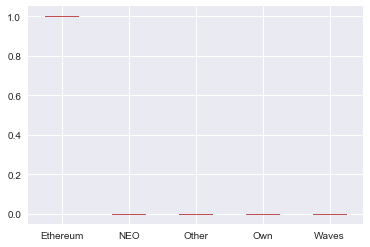

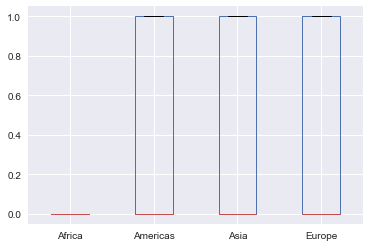

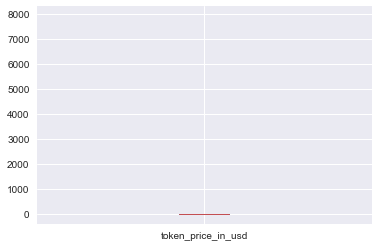

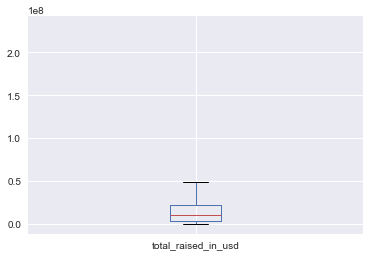

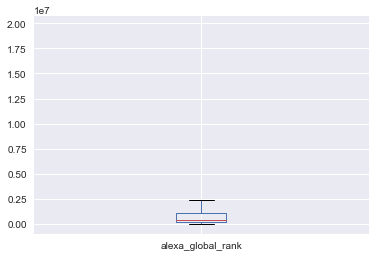

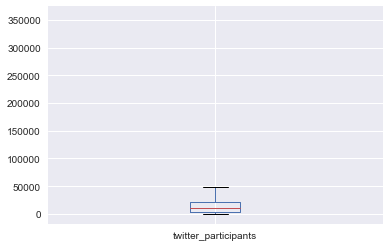

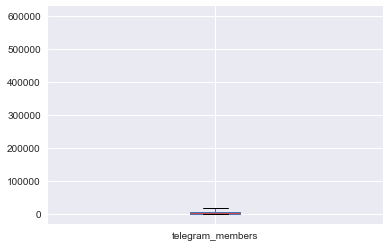

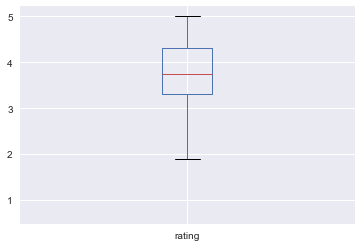

,title,slug,ticker,platform,origin,token_price_in_usd,total_raised_in_usd,whitelist_required,alexa_global_rank,twitter_participants,telegram_members,rating,y
0,0x,0x,ZRX,Ethereum,Americas,0.0480,24000000.0,True,94140,129385,5915,4.3,1
1,1World,1world,1WO,Ethereum,Asia,1.2000,11000000.0,True,1368823,8633,8308,4.3,1
2,300 Token,300-token,300,Ethereum,Asia,79.7600,16724.0,False,3331243,8430,84876,1.7,0
3,AbjCoin,abjcoin,ABJ,Ethereum,Asia,0.5000,450000.0,False,1400355,21481,69049,4.1,1
4,Adbank,adbank,ADB,Ethereum,Americas,0.0465,14000000.0,False,585009,7854,14310,3.3,0


In [493]:
df_platform.plot.box(), plt.show()
df_origin.plot.box(), plt.show()
df['token_price_in_usd'].plot.box(), plt.show()
df['total_raised_in_usd'].plot.box(), plt.show()
df['alexa_global_rank'].plot.box(), plt.show()
df['twitter_participants'].plot.box(), plt.show()
df['telegram_members'].plot.box(), plt.show()
df['rating'].plot.box(), plt.show()
df.head()

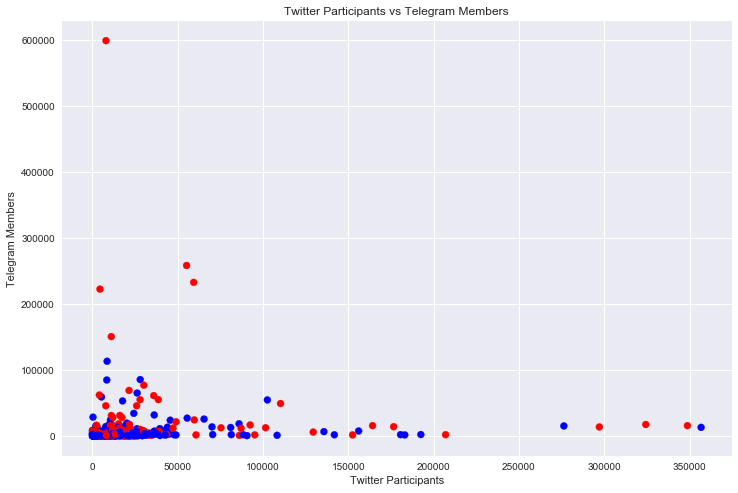

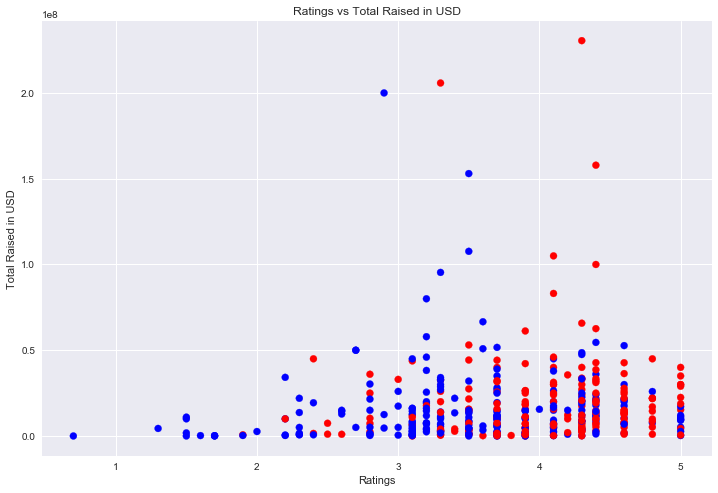

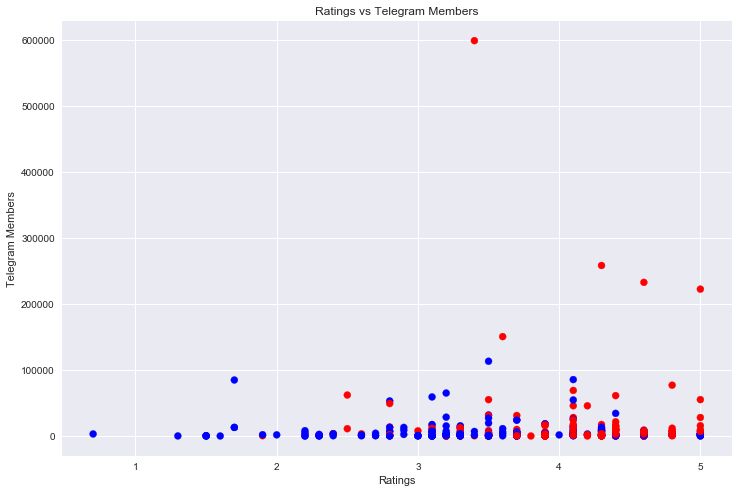

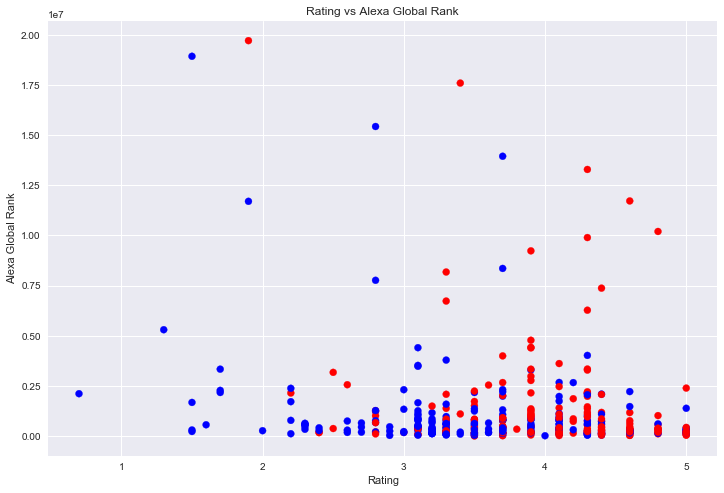

In [482]:
df['whitelist_required'] = df['whitelist_required'].replace("True",1).replace("False",0)
colors = df['y'].replace(1,"r").replace(0,"b")

f1 = plt.figure(figsize=(12,8))
ax1 = f1.add_subplot(111)
ax1.scatter(df['twitter_participants'],df['telegram_members'],c=colors)
plt.title("Twitter Participants vs Telegram Members")
plt.xlabel("Twitter Participants")
plt.ylabel("Telegram Members")
plt.show()

f2 = plt.figure(figsize=(12,8))
ax2 = f2.add_subplot(111)
ax2.scatter(df['rating'],df['total_raised_in_usd'],c=colors)
plt.title("Ratings vs Total Raised in USD")
plt.xlabel("Ratings")
plt.ylabel("Total Raised in USD")
plt.show()

f3 = plt.figure(figsize=(12,8))
ax3 = f3.add_subplot(111)
plt.scatter(df['rating'],df['telegram_members'],c=colors)
plt.title("Ratings vs Telegram Members")
plt.xlabel("Ratings")
plt.ylabel("Telegram Members")
plt.show()

f4 = plt.figure(figsize=(12,8))
ax4 = f4.add_subplot(111)
plt.scatter(df['rating'],df['alexa_global_rank'],c=colors)
plt.title("Rating vs Alexa Global Rank")
plt.xlabel("Rating")
plt.ylabel("Alexa Global Rank")
plt.show()

## Logistic Regression Model

In [13]:
df_final = pd.concat([df[['total_raised_in_usd', 'alexa_global_rank', 'twitter_participants', 'whitelist_required', 'telegram_members', 'rating']], df_platform, df_origin], axis=1)
df_final.shape
df_final.head()

,total_raised_in_usd,alexa_global_rank,twitter_participants,whitelist_required,telegram_members,rating,Ethereum,NEO,Other,Own,Waves,Africa,Americas,Asia,Europe
0,24000000.0,94140,129385,True,5915,4.3,1,0,0,0,0,0,1,0,0
1,11000000.0,1368823,8633,True,8308,4.3,1,0,0,0,0,0,0,1,0
2,16724.0,3331243,8430,False,84876,1.7,1,0,0,0,0,0,0,1,0
3,450000.0,1400355,21481,False,69049,4.1,1,0,0,0,0,0,0,1,0
4,14000000.0,585009,7854,False,14310,3.3,1,0,0,0,0,0,1,0,0


In [14]:
X = df_final
y = df['y']
total = pd.concat([X,y], axis=1)
total.to_csv('total.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(C=0.1,penalty='l1')
clf.fit(X_train, y_train)
joblib.dump(clf, 'ico_predictor.pkl')
clf.score(X_test,y_test)

0.7142857142857143

In [15]:
clf.predict([[1232,1412,24123,123123,5,1,0,0,0,0,0,0,0,0,0]])
X.columns

Index([u'total_raised_in_usd', u'alexa_global_rank', u'twitter_participants',
       u'whitelist_required', u'telegram_members', u'rating', u'Ethereum',
       u'NEO', u'Other', u'Own', u'Waves', u'Africa', u'Americas', u'Asia',
       u'Europe'],
      dtype='object')

Area under the ROC curve : 0.871503


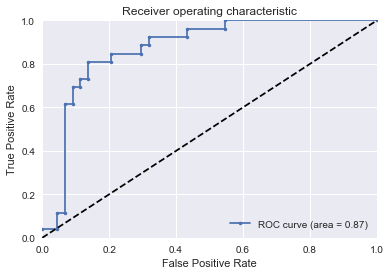

In [497]:
def run_cv(X,y,clf_class,**kwargs):
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
   
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

def generate_auc(X,y,clf_class,**kwargs):
    random_state = np.random.RandomState(0)
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print "Area under the ROC curve : %f" % roc_auc
    return fpr, tpr, roc_auc, thresholds

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

0.199204570845
0.738095238095


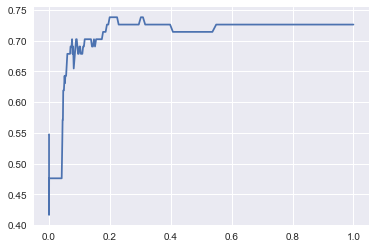

In [489]:
alphas = np.logspace(-10,0,1000)
scores = []
for alpha in alphas:
    regr = LogisticRegression(penalty='l1',C=alpha)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))

plt.plot(alphas,scores)
best_alpha = alphas[np.argmax(scores)]
print(best_alpha)
print(np.max(scores))

### Optimization using Ridge Regression

In [480]:
alphas = np.logspace(-3,-1,30)
scores = []

for alpha in alphas:
    regr = LogisticRegression(penalty='l1',C=alpha)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))
    
alpha_optim = alphas[np.argmax(scores)]

optim = LogisticRegression(penalty='l1',C=alpha_optim)
optim.fit(X_train, y_train)
y_pred2 = optim.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print('Accuracy: ', accuracy)

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
print("AUC ROC: ", roc_auc)


('Accuracy: ', 0.70238095238095233)
('AUC ROC: ', 0.71453089244851253)


### Cross Validation

In [481]:
scores = cross_val_score(regr, X, y, cv = 5)
print(scores)

[ 0.71428571  0.69047619  0.53012048  0.60240964  0.52439024]


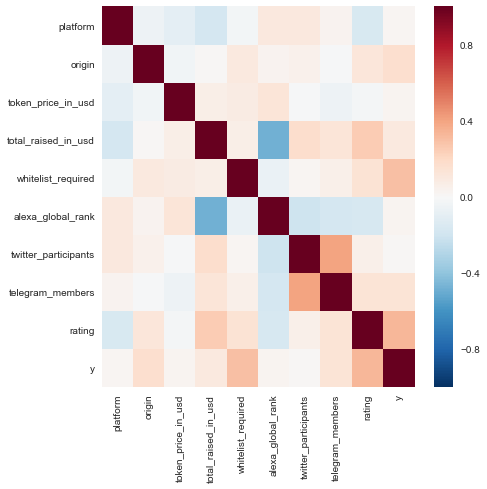

In [447]:
le = preprocessing.LabelEncoder()
cols = df.drop(['title','slug','ticker'],1)
for col in cols:
    if col != 'age' and col != 'hours_per_week':
        cols[col]=le.fit_transform(cols[col])

corr = cols.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Random Forest Classifier

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [451]:
clf = RandomForestClassifier()

In [466]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.70238095238095233

Area under the ROC curve : 0.774476


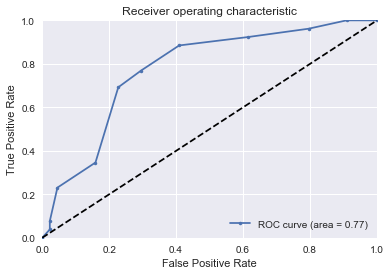

In [453]:
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,RandomForestClassifier)
generate_ROCplot(fpr,tpr,'LR',roc_auc)

## Decision Tree Classifier

### Decision Tree Classifier with Max Depth of 5

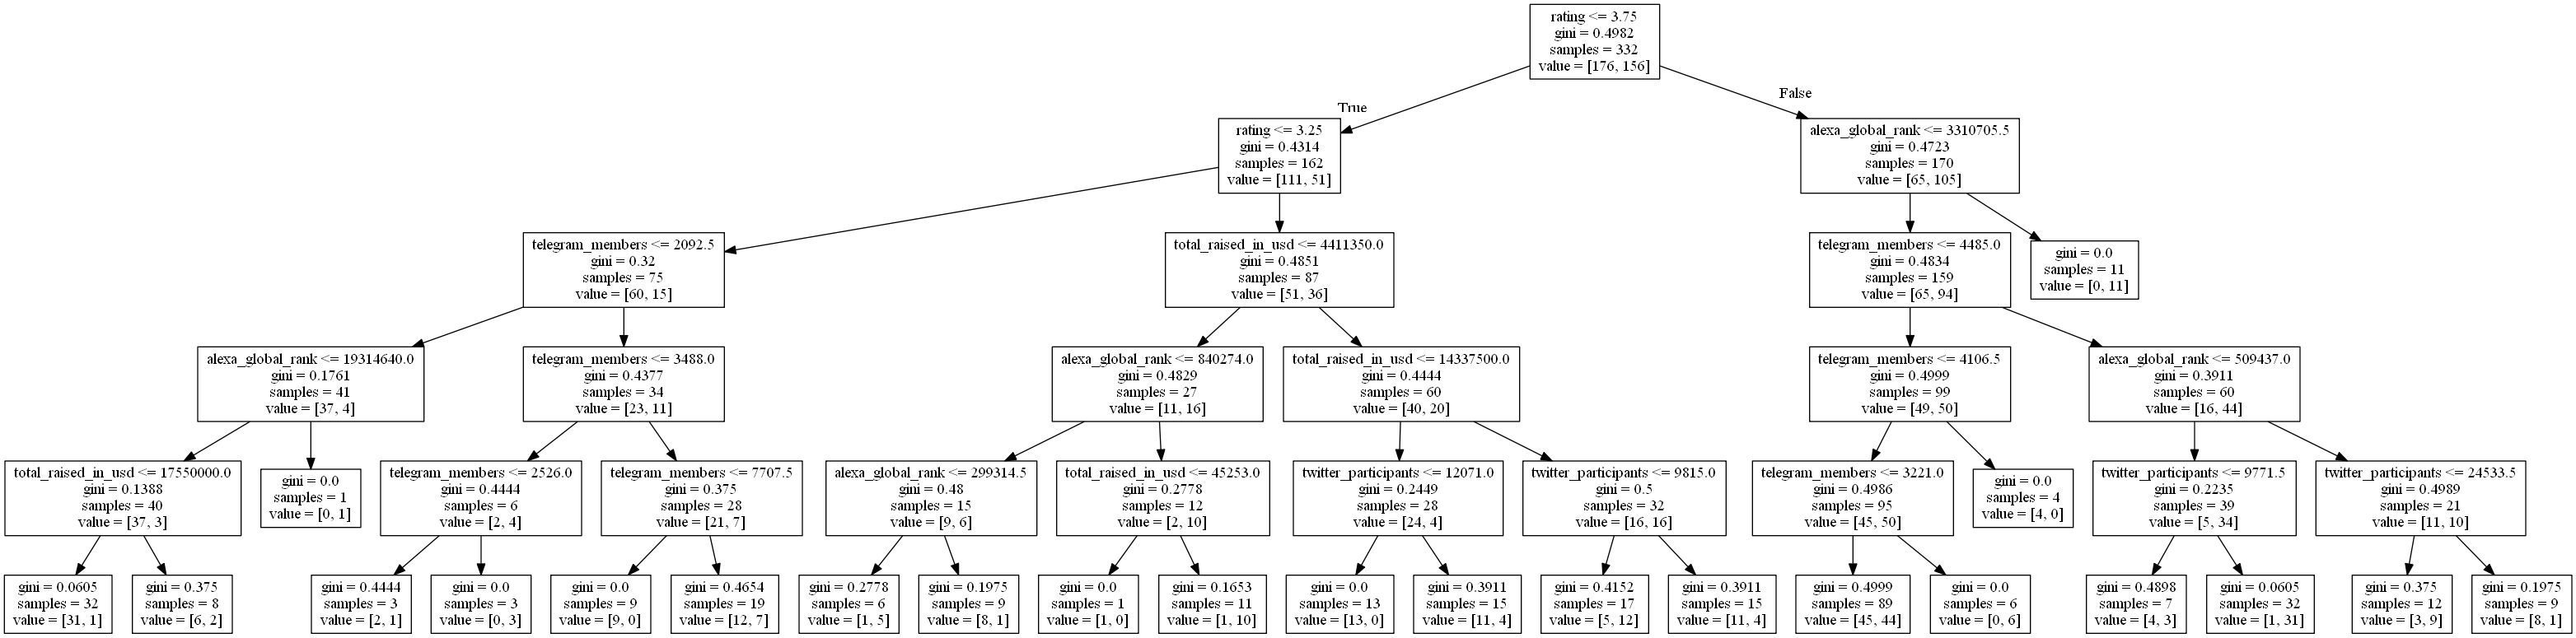

In [378]:
X = df[['total_raised_in_usd', 'alexa_global_rank', 'twitter_participants', 'telegram_members', 'rating']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data, feature_names=X_train.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


AUC ROC = 0.748570


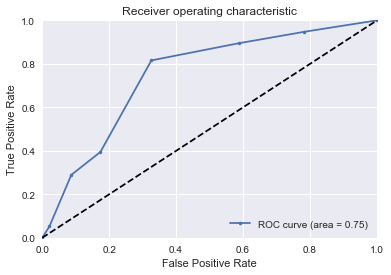

In [379]:
clf = DecisionTreeRegressor(max_depth=3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC ROC = %f" % roc_auc)

plt.clf()
plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

AUC ROC is lower than the one from Logistic Regression. Finding the optimal tree depth below:

### Finding the Optimal Tree Depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


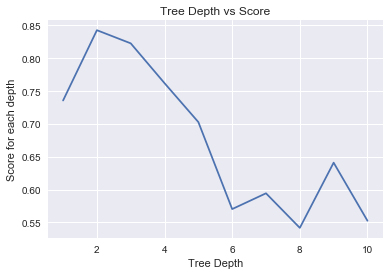

0.842677345538


In [377]:
tree_depths = range(1,11)
print(tree_depths)

tree_scores = []
def generate_auc(X,y,clf_class,**kwargs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, thresholds

for depth in tree_depths:
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,DecisionTreeClassifier, max_depth=depth)
    tree_scores.append(roc_auc)
    
plt.plot(tree_depths,tree_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Score for each depth')
plt.title('Tree Depth vs Score')
plt.show()

opt_depth = tree_depths[np.argmax(tree_scores)]

fpr, tpr, roc_auc, thresholds= generate_auc(X,y,DecisionTreeClassifier, max_depth=opt_depth)
print(roc_auc)